In [10]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments

from model import run
# from model.parts.utils import *

mc_df = run.run()
#rdf = run.postprocessing(df)
#rdf = df # debugging substeps# 



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 3, 3, 3)
Execution Method: local_simulations
SimIDs   : [0, 0, 0]
SubsetIDs: [0, 0, 0]
Ns       : [0, 1, 2]
ExpIDs   : [0, 0, 0]
Execution Mode: parallelized
Total execution time: 0.13s


In [11]:
mc_df

,soil_moisture,ph,node,simulation,subset,run,substep,timestep
0,40.000,5.800,1,0,0,1,0,0
1,39.989,5.771,65,0,0,1,1,1
2,39.978,5.742,22,0,0,1,1,2
3,39.967,5.714,90,0,0,1,1,3
4,39.956,5.686,11,0,0,1,1,4
...,...,...,...,...,...,...,...,...
2998,30.532,0.101,24,0,0,3,1,996
2999,30.524,0.101,26,0,0,3,1,997
3000,30.516,0.101,46,0,0,3,1,998
3001,30.508,0.101,75,0,0,3,1,999


In [12]:
import plotly.express as px

px.line(mc_df, x='timestep', y=['soil_moisture', 'ph'], facet_row='run', height=800, width=1000)

In [13]:
px.scatter(mc_df, x='node', y=['soil_moisture', 'ph'], facet_row='run', height=800, width=1000)

In [14]:
df= mc_df[mc_df.run == 1]

In [15]:
df['timestep'] = pd.to_timedelta(df['timestep'], unit='D') + pd.Timestamp('2023-01-01')

print(df['timestep'])


0      2023-01-01
1      2023-01-02
2      2023-01-03
3      2023-01-04
4      2023-01-05
          ...    
996    2025-09-23
997    2025-09-24
998    2025-09-25
999    2025-09-26
1000   2025-09-27
Name: timestep, Length: 1001, dtype: datetime64[ns]


<ipython-input-15-7332c0ae3dde>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
df

,soil_moisture,ph,node,simulation,subset,run,substep,timestep
0,40.000,5.800,1,0,0,1,0,2023-01-01
1,39.989,5.771,65,0,0,1,1,2023-01-02
2,39.978,5.742,22,0,0,1,1,2023-01-03
3,39.967,5.714,90,0,0,1,1,2023-01-04
4,39.956,5.686,11,0,0,1,1,2023-01-05
...,...,...,...,...,...,...,...,...
996,30.532,0.101,82,0,0,1,1,2025-09-23
997,30.524,0.101,28,0,0,1,1,2025-09-24
998,30.516,0.101,75,0,0,1,1,2025-09-25
999,30.508,0.101,100,0,0,1,1,2025-09-26


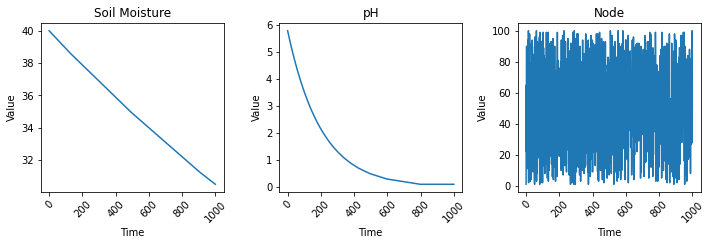

In [17]:
plt.figure(figsize=(10, 6))

# Plotting soil moisture
plt.subplot(2, 3, 1)
plt.plot(df.index, df['soil_moisture'])
plt.title('Soil Moisture')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Plotting pH
plt.subplot(2, 3, 2)
plt.plot(df.index, df['ph'])
plt.title('pH')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Plotting node
plt.subplot(2, 3, 3)
plt.plot(df.index, df['node'])
plt.title('Node')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)


# Adjusting subplot spacing
plt.tight_layout()

# Displaying the plots
plt.show()


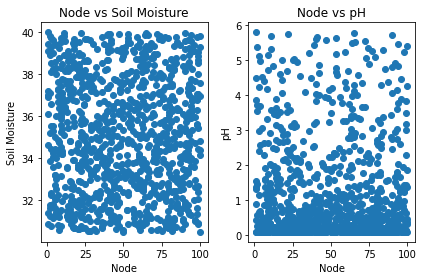

In [18]:
import matplotlib.pyplot as plt

# Scatter plot: Node vs Soil Moisture
plt.subplot(1, 2, 1)
plt.scatter(df['node'], df['soil_moisture'])
plt.xlabel('Node')
plt.ylabel('Soil Moisture')
plt.title('Node vs Soil Moisture')

# Scatter plot: Node vs pH
plt.subplot(1, 2, 2)
plt.scatter(df['node'], df['ph'])
plt.xlabel('Node')
plt.ylabel('pH')
plt.title('Node vs pH')

# Adjusting subplot spacing
plt.tight_layout()

# Displaying the plots
plt.show()
